# Projekt - klasifikacija znamenki

## OPIS PROBLEMA

Ovaj projekt pokazuje kako se scikit-learn može koristiti za prepoznavanje slika rukom napisanih znamenki, od 0-9.

* Klasifikacija znamenki



In [1]:
# pakete i biblioteke koje smo koristili te dataset

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

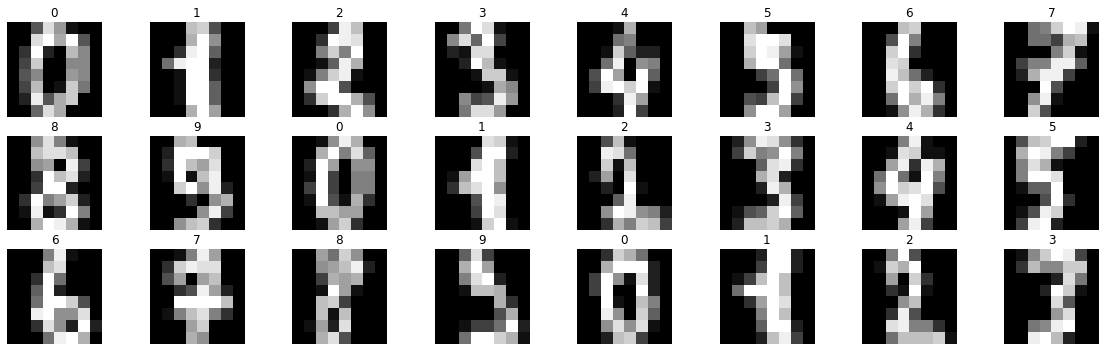

In [2]:
# Prikazat nekoliko slika i ispis pripadajućih oznakama.
plt.figure(figsize=(20,8))
for i in range(24):
  plt.subplot(4,8, i +1)
  plt.imshow(digits.images[i], cmap = 'gray')
  plt.axis('off')
  plt.title(digits.target[i])

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
# Da bismo primijenili klasifikator na ove podatke, moramo izravnati slike, 
# pretvarajući svaki 2-D niz vrijednosti oblika (8, 8) u oblik (64,).

data = digits.images.reshape((len(digits.images), -1))

data.shape

(1797, 64)

In [5]:
# Podjela na train i test skupove
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, random_state=42)

In [6]:
# koje modele cemo koristi smo pronasli pomocu ove poveznice: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# algoritmi koje cemo testirati
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(42)

# Funkcija za fittanje algoritma, predviđanje i evaluaciju:
def run_algorithm (algorithm, X_train, X_test, y_train, y_test):
    
    model = algorithm.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, average='micro')
    rec = recall_score(y_test, predictions, average='micro')
    f1 = f1_score(y_test, predictions, average='micro')
    
    return model, acc, prec, rec, f1

In [8]:
from pandas.core.common import random_state
# Algoritmi koje ćemo testirati
algorithms = [
              LogisticRegression(random_state=42),
              SVC(random_state=42, gamma=0.001),
              SGDClassifier(random_state=42),
              LinearSVC(random_state=42, dual=False),
              GradientBoostingClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              KNeighborsClassifier(),
              GaussianNB(),
              DecisionTreeClassifier(random_state=42),
            ]

# funkcija za ispis rezulata modela 
def print_result(result):  
   print(result[0])
   print("Accuracy: ", result[1])
   print("Precision: ", result[2])
   print("Recall: ", result[3])
   print("F1 score: ", result[4], "\n")

In [9]:
algorithm_results = []
np.random.seed(42)

# Iteriramo kroz listu algoritama i spremamo rezultate u gornju listu
for algorithm_name in algorithms:
    model, acc, prec, rec, f1 = run_algorithm (algorithm_name, X_train, X_test, y_train, y_test)
    result = (model, acc, prec, rec, f1)
    algorithm_results.append(result)
 
# Sortiranje liste po F1-score silazno
def sort_key(f1):
    return f1[2]

algorithm_results.sort(key = sort_key, reverse=True)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Top 5 modela

In [10]:
for alg in algorithm_results[:5]:
  print_result(alg)

SVC(gamma=0.001, random_state=42)
Accuracy:  0.9888888888888889
Precision:  0.9888888888888889
Recall:  0.9888888888888889
F1 score:  0.9888888888888889 

KNeighborsClassifier()
Accuracy:  0.9861111111111112
Precision:  0.9861111111111112
Recall:  0.9861111111111112
F1 score:  0.9861111111111112 

RandomForestClassifier(random_state=42)
Accuracy:  0.9722222222222222
Precision:  0.9722222222222222
Recall:  0.9722222222222222
F1 score:  0.9722222222222222 

LogisticRegression(random_state=42)
Accuracy:  0.9694444444444444
Precision:  0.9694444444444444
Recall:  0.9694444444444444
F1 score:  0.9694444444444444 

GradientBoostingClassifier(random_state=42)
Accuracy:  0.9694444444444444
Precision:  0.9694444444444444
Recall:  0.9694444444444444
F1 score:  0.9694444444444444 



Najbolje rezulate daju `SVC`, `KNeighborsClassifier` i `RandomForestClassifier` te cemo dalje mijenjati hiperparametre samo na njima.

# Hyperparameters

##SVC

In [11]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

grid = {
    "kernel" : ["linear", "rbf", "poly", "sigmoid"],
    "gamma" : [0.001, 0.01, 0.1, 1],
    "C" : [0.1, 10, 100],
    "degree" : [0, 2, 4]
}

svc = SVC();

# Postavljanje GridSearchCV
gs_svc = GridSearchCV(estimator=svc,
                      param_grid= grid,
                      cv=5,
                      verbose=2)

# Fit GridSearchCV
gs_svc.fit(X_train, y_train);

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ........C=0.1, degree=0, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, degree=0, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, degree=0, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, degree=0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ........C=0.1, degree=0, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...........C=0.1, degree=0, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ...........C=0.1, degree=0, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ...........C=0.1, degree=0, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ...........C=0.1, degree=0, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END ...........C=0.1, degree=0, gamma=0.001, kernel=rbf; total time=   0.5s
[CV] END ..........C=0.1, degree=0, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=0, gamma=0.00

In [12]:
# najbolji parametri svc
gs_svc.best_params_

{'C': 10, 'degree': 0, 'gamma': 0.001, 'kernel': 'rbf'}

In [13]:
# rezultat s najboljim parametrima
np.random.seed(42)
algoritam = SVC(C= 10, degree= 0, gamma=0.001, kernel="rbf")
model, acc, prec, rec, f1 = run_algorithm (algoritam, X_train, X_test, y_train, y_test)
result = (model, acc, prec, rec, f1)

print_result(result)

SVC(C=10, degree=0, gamma=0.001)
Accuracy:  0.9888888888888889
Precision:  0.9888888888888889
Recall:  0.9888888888888889
F1 score:  0.9888888888888889 



Dobili smo isti rezultat kao i prvi put.

##KNeighborsClassifier

In [14]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


knn = KNeighborsClassifier()

# Postavljanje GridSearchCV
gs_knn = GridSearchCV(estimator=knn,
                      param_grid= grid_params,
                      cv=5,
                      verbose=2)

# Fit GridSearchCV
gs_knn.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, we

In [15]:
# najbolji parametri knn
gs_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [16]:
# rezultat s najboljim parametrima
np.random.seed(42)
algoritam = KNeighborsClassifier(metric="minkowski", n_neighbors=5, weights="distance")
model, acc, prec, rec, f1 = run_algorithm (algoritam, X_train, X_test, y_train, y_test)
result = (model, acc, prec, rec, f1)

print_result(result);

KNeighborsClassifier(weights='distance')
Accuracy:  0.9861111111111112
Precision:  0.9861111111111112
Recall:  0.9861111111111112
F1 score:  0.9861111111111112 



Isti rezultat kao i prvi put.

##RandomForestClassifier

In [17]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

grid_params = { 'n_estimators' : [100, 200, 1000],
                "max_depth": [None, 10],
                "max_features" : ["auto", "sqrt"],
                "min_samples_split" : [2, 6],
                "min_samples_leaf" : [1, 2]
               }

rfc = RandomForestClassifier()

# Postavljanje GridSearchCV
gs_rfc = GridSearchCV(estimator=rfc,
                      param_grid= grid_params,
                      cv=5,
                      verbose=2)

# Fit GridSearchCV
gs_rfc.fit(X_train, y_train);

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2,

In [18]:
# najbolji parametri rfc
gs_rfc.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [19]:
# rezultat s najboljim parametrima
np.random.seed(42)
algoritam = RandomForestClassifier(max_depth=None,
                                   max_features='sqrt',
                                   min_samples_leaf= 1,
                                   min_samples_split= 2,
                                   n_estimators= 1000)
model, acc, prec, rec, f1 = run_algorithm (algoritam, X_train, X_test, y_train, y_test)
result = (model, acc, prec, rec, f1)

print_result(result)

RandomForestClassifier(max_features='sqrt', n_estimators=1000)
Accuracy:  0.9777777777777777
Precision:  0.9777777777777777
Recall:  0.9777777777777777
F1 score:  0.9777777777777777 



Dobili smo bolji rezulatat nego prije za isti algoritam, ali jos nedovoljno da je najbolji.

I dalje vidimo da nam je najbolji algoritam bio: `SVC(gamma=0.001, random_state=42)`

Najbolji model (SVC)

In [20]:
np.random.seed(42)
algoritam = SVC(gamma=0.001, random_state=42)

model, acc, prec, rec, f1 = run_algorithm (algoritam, X_train, X_test, y_train, y_test)
result = (model, acc, prec, rec, f1)

print_result(result)

SVC(gamma=0.001, random_state=42)
Accuracy:  0.9888888888888889
Precision:  0.9888888888888889
Recall:  0.9888888888888889
F1 score:  0.9888888888888889 



In [21]:
# Predikcija na testnim podacima
predictions = model.predict(X_test[:134])

# Print predikcija kao oznake
print(f"Predikcije: {predictions}")
# Print stvarne oznake
print(f"Stvarne oznake: {y_test[:134]}")

(predictions == y_test[:134]).all()

Predikcije: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 9]
Stvarne oznake: [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7]


False

Oznaka: 7


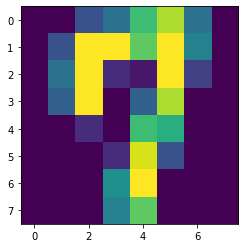

In [22]:
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.2, random_state=42)

# Prikaz prve krive predikcije (stvarna vrijednost 7, a predvidjelo je 9)
plt.imshow(X_test[133])
print(f"Oznaka: {y_test[133]}")

# Convolutional Neural Networks (CNN)

## 1) Preuzimanje slika 

In [23]:
#Import biblioteka
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense

In [24]:
#Dohvacanje slika
digits = datasets.load_digits()

In [25]:
# Podjela na train i test skupove
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.2, random_state=42)

In [26]:
# Get shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 8, 8), (360, 8, 8), (1437,), (360,))

Oznaka: 6


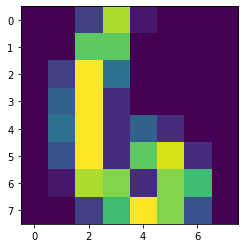

In [27]:
# Prikaz prve slike i oznake skupa za treniranje
plt.imshow(X_train[0])
print(f"Oznaka: {y_train[0]}")

## 2) Priprema slika

In [28]:
# Preoblikujmo podatke da bi odgovarale modelu
train_images = X_train.reshape(1437, 8, 8, 1)
test_images = X_test.reshape(360, 8, 8, 1)

In [29]:
# One-Hot Encoding:
train_labels = keras.utils.to_categorical(y_train)
test_labels = keras.utils.to_categorical(y_test)

# Nova oznaka za isti podatak
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## 3) Arhitektura mreze

In [30]:
# CNN model
model = tf.keras.Sequential()

# Dodavanje layera
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(8, 8, 1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))  # 10 jer imamo 10 razlicitih oznaka


## 4) Odabir optimizacijskog algoritma

In [31]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

## 5) Treniranje

In [32]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=20)

Epoch 1/20
45/45 [==============================] - 1s 13ms/step - loss: 0.8818 - accuracy: 0.7370 - val_loss: 0.2181 - val_accuracy: 0.9194
Epoch 2/20
45/45 [==============================] - 0s 8ms/step - loss: 0.2282 - accuracy: 0.9290 - val_loss: 0.1303 - val_accuracy: 0.9722
Epoch 3/20
45/45 [==============================] - 0s 8ms/step - loss: 0.1155 - accuracy: 0.9708 - val_loss: 0.1011 - val_accuracy: 0.9639
Epoch 4/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0764 - accuracy: 0.9840 - val_loss: 0.0842 - val_accuracy: 0.9806
Epoch 5/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0554 - accuracy: 0.9882 - val_loss: 0.0845 - val_accuracy: 0.9750
Epoch 6/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0369 - accuracy: 0.9930 - val_loss: 0.0755 - val_accuracy: 0.9778
Epoch 7/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0284 - accuracy: 0.9930 - val_loss: 0.0604 - val_accuracy: 0.9806
Epoch 8/20
45/45 [=

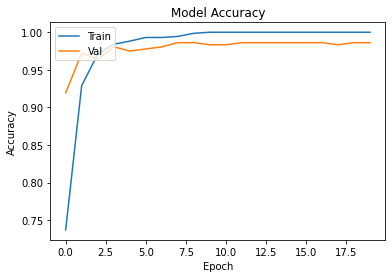

In [33]:
# Vizualizacija preciznosti
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

In [34]:
# Prikaz predikcija kao vjerojatnosti za prve 4 slike u testnom skupu
predictions = model.predict(X_test[:8])
predictions

array([[2.11042961e-09, 2.09037996e-08, 2.95837898e-12, 8.64523669e-15,
        1.52403157e-08, 9.32603612e-08, 9.99999404e-01, 2.02761766e-10,
        4.91054323e-07, 1.36156378e-10],
       [3.13821802e-10, 7.54512675e-10, 7.70314293e-15, 4.49918616e-07,
        4.05546086e-09, 7.71068269e-04, 8.42461612e-14, 9.76574981e-08,
        4.80358464e-09, 9.99228358e-01],
       [5.71595576e-18, 2.39013948e-10, 7.08622536e-11, 9.99999881e-01,
        5.35408637e-15, 2.28905894e-10, 4.02199460e-13, 5.41496359e-09,
        3.70636144e-08, 6.47340457e-08],
       [2.07722474e-06, 1.06350342e-06, 1.28781539e-04, 2.32606361e-08,
        2.44255534e-06, 4.48042789e-04, 5.05817521e-09, 9.99165416e-01,
        3.31597835e-06, 2.48856057e-04],
       [1.52808096e-11, 4.25202167e-08, 9.99743998e-01, 1.12996655e-04,
        1.69984996e-15, 5.80828875e-12, 9.02136144e-09, 1.27836000e-08,
        1.42931778e-04, 2.49311038e-09],
       [2.94303228e-11, 9.85782862e-01, 1.85405929e-03, 1.69932241e-06,
   

In [35]:
# Print predikcija kao oznake
print(np.argmax(predictions, axis=1))
# Print stvarne oznake
print(y_test[:8])

[6 9 3 7 2 1 5 2]
[6 9 3 7 2 1 5 2]


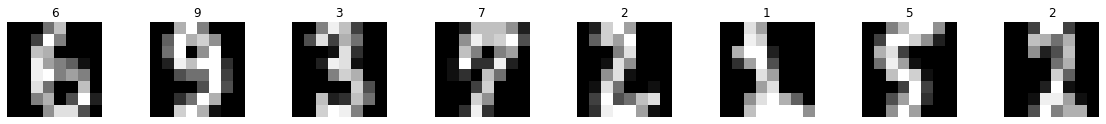

In [36]:
# Prikazat nekoliko slika i ispis pripadajućih oznakama.
plt.figure(figsize=(20,8))
for i in range(8):
  plt.subplot(4,8, i +1)
  plt.imshow(X_test[i], cmap = 'gray')
  plt.axis('off')
  plt.title(y_test[i])

In [37]:
# Predikcija na testnim podacima
n = 150

predictions = model.predict(X_test[:n])

# Print predikcija kao oznake
print(f"Predikcije: \n {np.argmax(predictions, axis=1)} ")

# Print stvarne oznake
print(f"Stvarne oznake: \n {y_test[:n]}")

(np.argmax(predictions, axis=1) == y_test[:n]).all()

Predikcije: 
 [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 5] 
Stvarne oznake: 
 [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3]


False

Oznaka: 3


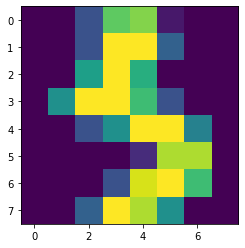

In [38]:
# Prikaz prve slike i oznake skupa za treniranje
plt.imshow(X_test[149])
print(f"Oznaka: {y_test[149]}")